<a href="https://colab.research.google.com/github/Villgarc/Pandas-notes/blob/main/Pandas_notes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

## **4. How to create plots in pandas**

In order to plot graphs in pandas we first have to import the matplotlib library. Then, we will be able to use the tools offered by this library on top of pandas' Dataframes. Here I will show some examples of how this plotting library is used, but for further understanding on the topic I recommend checking out the matplotlib's website.

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./sample_data/california_housing_test.csv')

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

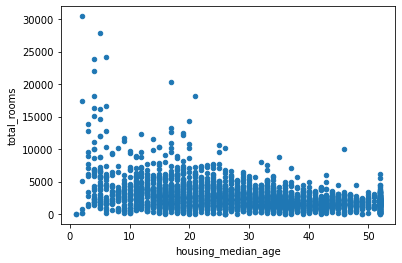

In [5]:
data.plot.scatter(x='housing_median_age',y='total_rooms')

,Temperature (Celcius)
2017-01-13,25
2017-01-14,23
2017-01-15,24
2017-01-16,25
2017-01-17,25
2017-01-18,26
2017-01-19,23
2017-01-20,22
2017-01-21,24
2017-01-22,27


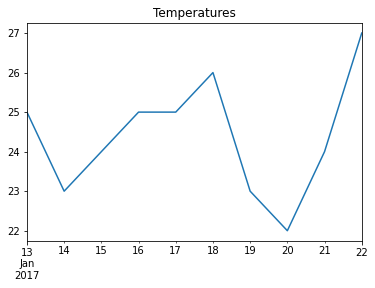

In [6]:
days = pd.date_range(start='1/13/2017',periods=10)
temperatures = pd.DataFrame({'Temperature (Celcius)':[25,23,24,25,25,26,23,22,24,27]},index=days)
display(temperatures)
temperatures['Temperature (Celcius)'].plot(title='Temperatures')

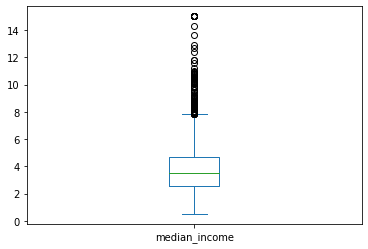

In [7]:
data['median_income'].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b0d83aa50>,
      dtype=object)

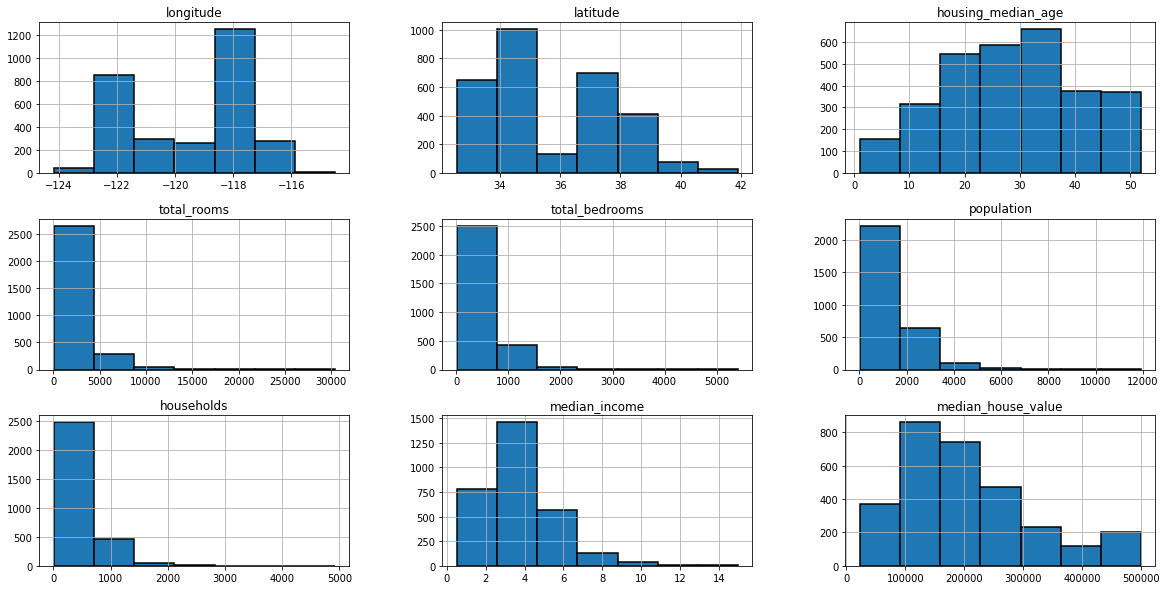

In [8]:
data.hist(bins=7,figsize=(20,10),edgecolor='black',linewidth=1.5)

## **5.Working with columns and rows**

Renaming, creating and deleting columns is essential when we are working with our Dataframes.

With the **rename** method we can change the names of the index and columns of our data. axis=0 refers to the rows whereas axis=1 refers to the columns. The **inplace** parameter is important since if it is not set to True, the changes to the axis will not be applied to the Dataframe.

In [9]:
temperatures['Temperature (Celcius)'] = temperatures['Temperature (Celcius)'] + 273.15
temperatures.rename(columns={'Temperature (Celcius)':'Temperature (Kelvin)'},inplace=True)
temperatures

,Temperature (Kelvin)
2017-01-13,298.15
2017-01-14,296.15
2017-01-15,297.15
2017-01-16,298.15
2017-01-17,298.15
2017-01-18,299.15
2017-01-19,296.15
2017-01-20,295.15
2017-01-21,297.15
2017-01-22,300.15


In [10]:
temperatures.rename(lambda x : x.strftime('%d %B %Y'),axis=0,inplace=True)
temperatures

,Temperature (Kelvin)
13 January 2017,298.15
14 January 2017,296.15
15 January 2017,297.15
16 January 2017,298.15
17 January 2017,298.15
18 January 2017,299.15
19 January 2017,296.15
20 January 2017,295.15
21 January 2017,297.15
22 January 2017,300.15


The drop method is used to eliminate columns and rows from a Dataframe. There are also two noteworthy variations. The **dropna** method returns a DataFrame without including the misssing data and the **drop_duplicates** method returns a DataFrame with the duplicate rows removed.

Let's add two new columns to the temperatures DataFrame. One of them will be composed of integer values whereas the other will be empty.

In [11]:
temperatures['Rain (mm/h)'] = [12.2,13.3,5,4.3,0,0,0,13.4,15,None]
temperatures['Deaths'] = [None for x in range(10)]
temperatures

,Temperature (Kelvin),Rain (mm/h),Deaths
13 January 2017,298.15,12.2,None
14 January 2017,296.15,13.3,None
15 January 2017,297.15,5.0,None
16 January 2017,298.15,4.3,None
17 January 2017,298.15,0.0,None
18 January 2017,299.15,0.0,None
19 January 2017,296.15,0.0,None
20 January 2017,295.15,13.4,None
21 January 2017,297.15,15.0,None
22 January 2017,300.15,NaN,None


In [12]:
new_temperatures = pd.DataFrame([[None,27,13],[None,27,13],[None,None,None]],columns = temperatures.columns)
temperatures = temperatures.append(new_temperatures)
temperatures

,Temperature (Kelvin),Rain (mm/h),Deaths
13 January 2017,298.15,12.2,NaN
14 January 2017,296.15,13.3,NaN
15 January 2017,297.15,5.0,NaN
16 January 2017,298.15,4.3,NaN
17 January 2017,298.15,0.0,NaN
18 January 2017,299.15,0.0,NaN
19 January 2017,296.15,0.0,NaN
20 January 2017,295.15,13.4,NaN
21 January 2017,297.15,15.0,NaN
22 January 2017,300.15,NaN,NaN


The new DataFrame is awful, the indexes of the additional values are not defined as the other. Let's start by removing the duplicated values.

In [13]:
temperatures.drop_duplicates(inplace=True)
temperatures

,Temperature (Kelvin),Rain (mm/h),Deaths
13 January 2017,298.15,12.2,NaN
14 January 2017,296.15,13.3,NaN
15 January 2017,297.15,5.0,NaN
16 January 2017,298.15,4.3,NaN
17 January 2017,298.15,0.0,NaN
18 January 2017,299.15,0.0,NaN
19 January 2017,296.15,0.0,NaN
20 January 2017,295.15,13.4,NaN
21 January 2017,297.15,15.0,NaN
22 January 2017,300.15,NaN,NaN


I would like to remove the 'Deaths' column because it is not useful at all.

In [14]:
temperatures.drop(['Deaths'],axis=1,inplace=True)
temperatures

,Temperature (Kelvin),Rain (mm/h)
13 January 2017,298.15,12.2
14 January 2017,296.15,13.3
15 January 2017,297.15,5.0
16 January 2017,298.15,4.3
17 January 2017,298.15,0.0
18 January 2017,299.15,0.0
19 January 2017,296.15,0.0
20 January 2017,295.15,13.4
21 January 2017,297.15,15.0
22 January 2017,300.15,NaN


Now, we will get rid of those  Nan values that are not needed. The dropna method will eliminate every single entry that has a Nan value in at least one of the colums.

In [15]:
temperatures.dropna(inplace=True)
temperatures

,Temperature (Kelvin),Rain (mm/h)
13 January 2017,298.15,12.2
14 January 2017,296.15,13.3
15 January 2017,297.15,5.0
16 January 2017,298.15,4.3
17 January 2017,298.15,0.0
18 January 2017,299.15,0.0
19 January 2017,296.15,0.0
20 January 2017,295.15,13.4
21 January 2017,297.15,15.0


And that was all, we have successfully created a Dataframe without undefined entries.

## **6.Statistics from a Dataframe**

We've discussed the basic methods provided by this library to work with statistics, but pandas can do more than calculate the mean, median or maximun value of a Dataframe.

We can obtained a statistic of multiple columns at once by selecting the columns we want to work on.

In [16]:
data.mean()

longitude               -119.589200
latitude                  35.635390
housing_median_age        28.845333
total_rooms             2599.578667
total_bedrooms           529.950667
population              1402.798667
households               489.912000
median_income              3.807272
median_house_value    205846.275000
dtype: float64

In [17]:
data[['median_house_value','median_income']].max()

median_house_value    500001.0000
median_income             15.0001
dtype: float64

The **agg** method allow us to predefined the set of statistics we want to aggregate to a given column.

In [18]:
data.agg({
    'population': ['min','max','mean','median'],
    'housing_median_age' : ['min','max','std','mean','median']
})

,population,housing_median_age
min,5.000000,1.000000
max,11935.000000,52.000000
mean,1402.798667,28.845333
median,1155.000000,29.000000
std,NaN,12.555396


Sometimes, it is necessary to calculate a given statistic for each category of a column. For this requirement, the **group_by** method is really handy because it split our data into different groups based on a column.

In [19]:
display(data[['population','housing_median_age']].groupby('population').mean().head())
display(data[['population','housing_median_age']].groupby('population').mean().tail())

,housing_median_age
population,
5.0,26.0
8.0,26.5
14.0,50.5
19.0,26.0
21.0,36.0


,housing_median_age
population,
8824.0,4.0
9419.0,2.0
10877.0,4.0
11139.0,12.0
11935.0,5.0


The above cell's result imply that the median age of houses located in places with low population have a tendency to be older than houses located at populated areas.

## **7.Reshaping a DataFrame**

It is common to deal with messy data when we are doing a research. Thus, it is important to know how to change the layout of our Dataframes in order to make the data comprehensible for us.

If we want to sort data according to a parameter given by a column, we can use the **sort_values** method.

In [20]:
display(data[['housing_median_age','median_income','median_house_value']].sort_values(by='housing_median_age').head())
display(data[['housing_median_age','median_income','median_house_value']].sort_values(by='housing_median_age').tail())

,housing_median_age,median_income,median_house_value
842,1.0,4.8750,141700.0
1115,1.0,1.6250,55000.0
2117,2.0,4.1000,315000.0
2429,2.0,4.5936,174300.0
495,2.0,2.5625,60000.0


,housing_median_age,median_income,median_house_value
717,52.0,1.8447,198200.0
708,52.0,3.1901,167600.0
1826,52.0,2.9712,116600.0
754,52.0,3.6729,137800.0
1499,52.0,3.0893,125000.0


The **sort_values** method orders the Dataframe in ascending order. If we want to order it in descending order we must set the ascending parameter to false.

In [21]:
display(data[['housing_median_age','median_income','median_house_value']].sort_values(by='housing_median_age',ascending=False).head())
display(data[['housing_median_age','median_income','median_house_value']].sort_values(by='housing_median_age',ascending=False).tail())

,housing_median_age,median_income,median_house_value
2507,52.0,4.1765,393900.0
1865,52.0,10.0825,397000.0
541,52.0,4.7396,441700.0
2876,52.0,5.0562,336700.0
306,52.0,3.1711,200800.0


,housing_median_age,median_income,median_house_value
2117,2.0,4.1000,315000.0
1271,2.0,4.6484,145900.0
2429,2.0,4.5936,174300.0
1115,1.0,1.6250,55000.0
842,1.0,4.8750,141700.0


The sort_values methods also offers the posibility to order multiple times a DataFrame based on different columns. The example below orders DataFrame's entries firstly in ascending order and secondly in descending order.

In [22]:
data[['housing_median_age','median_income','median_house_value']].sort_values(by=['housing_median_age','median_income'],ascending=[True,False]).head()

,housing_median_age,median_income,median_house_value
842,1.0,4.8750,141700.0
1115,1.0,1.6250,55000.0
1050,2.0,15.0001,350000.0
2452,2.0,6.2308,257900.0
1271,2.0,4.6484,145900.0


Now, let's have a look at the pivot method. This method reshapes a Dataframe based on column values. It is usually used when we have repeated values in a Dataframe. For instance, let's add a City column to the temperatures Dataframe. This column will have three values which are repeated over the City column.

In [23]:
temperatures['City'] = ['London','London','London','Paris','Paris','Paris','Rome','Rome','Rome']
temperatures

,Temperature (Kelvin),Rain (mm/h),City
13 January 2017,298.15,12.2,London
14 January 2017,296.15,13.3,London
15 January 2017,297.15,5.0,London
16 January 2017,298.15,4.3,Paris
17 January 2017,298.15,0.0,Paris
18 January 2017,299.15,0.0,Paris
19 January 2017,296.15,0.0,Rome
20 January 2017,295.15,13.4,Rome
21 January 2017,297.15,15.0,Rome


Then, we will change the index because we also want a list of repeated values at the index.

In [24]:
temperatures.index = ['Day 1','Day 2','Day 3','Day 1','Day 2','Day 3','Day 1','Day 2','Day 3']
display(temperatures)
print('\n')
temperatures.sort_values(by='City').pivot(columns='City',values='Temperature (Kelvin)')

,Temperature (Kelvin),Rain (mm/h),City
Day 1,298.15,12.2,London
Day 2,296.15,13.3,London
Day 3,297.15,5.0,London
Day 1,298.15,4.3,Paris
Day 2,298.15,0.0,Paris
Day 3,299.15,0.0,Paris
Day 1,296.15,0.0,Rome
Day 2,295.15,13.4,Rome
Day 3,297.15,15.0,Rome


City,London,Paris,Rome
Day 1,298.15,298.15,296.15
Day 2,296.15,298.15,295.15
Day 3,297.15,299.15,297.15


In [25]:
temperatures.sort_values(by='City').pivot(columns='City')

Temperature (Kelvin)                 Rain (mm/h)            
City                London   Paris    Rome      London Paris  Rome
Day 1               298.15  298.15  296.15        12.2   4.3   0.0
Day 2               296.15  298.15  295.15        13.3   0.0  13.4
Day 3               297.15  299.15  297.15         5.0   0.0  15.0

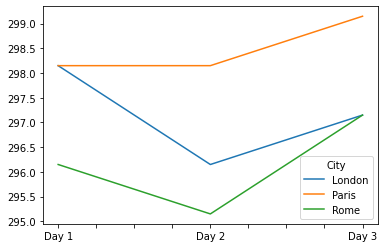

In [26]:
temperatures.pivot(columns='City')['Temperature (Kelvin)'].plot()

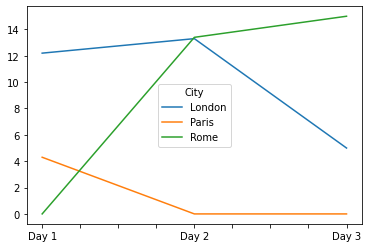

In [27]:
temperatures.pivot(columns='City')['Rain (mm/h)'].plot()

The examples above show that the pivot method may be used to simplify large amounts of data. The columns parameter must be defined because it will be used to create the second column.If the values parameter is not defined, the remaining columns will be the headers of the DataFrame.

The pivot_table method is used when we want to apply an aggregation function to the pivot method. The pivot method just rearrange the DataFrame whereas the pivot_table method provides an aggregation function on how to rearrange the values.

In [28]:
temperatures.pivot_table(columns='City',aggfunc='median')

City,London,Paris,Rome
Rain (mm/h),12.20,0.00,13.40
Temperature (Kelvin),297.15,298.15,296.15


In [29]:
temperatures_pivoted = temperatures.pivot(columns='City')
temperatures_pivoted

Temperature (Kelvin)                 Rain (mm/h)            
City                London   Paris    Rome      London Paris  Rome
Day 1               298.15  298.15  296.15        12.2   4.3   0.0
Day 2               296.15  298.15  295.15        13.3   0.0  13.4
Day 3               297.15  299.15  297.15         5.0   0.0  15.0

The melt method does the opposite that the pivot method. It melt all columns into two columns, one with the header's names and the other with the values. This method has several parameters such as the id_vars,var_name,value_name...

For more information about the melt method, check out the pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt

In [30]:
temperatures_pivoted['Rain (mm/h)'].melt(var_name='Cities',value_name='Rain in mm/h')

,Cities,Rain in mm/h
0,London,12.2
1,London,13.3
2,London,5.0
3,Paris,4.3
4,Paris,0.0
5,Paris,0.0
6,Rome,0.0
7,Rome,13.4
8,Rome,15.0


In [31]:
temperatures_pivoted['Rain (mm/h)'].melt(var_name='Cities',value_name='Rain in mm/h')

,Cities,Rain in mm/h
0,London,12.2
1,London,13.3
2,London,5.0
3,Paris,4.3
4,Paris,0.0
5,Paris,0.0
6,Rome,0.0
7,Rome,13.4
8,Rome,15.0


##**8.Combining DataFrames**

Imagine you are working with two different DataFrames which contains related data. It would be nice if both of them were the same DataFrame.

The concat function turns multiple DataFrames into a single one. By default, the concatenation operation is done at the row's axis, but by setting the axis parameter to 1, the concatenation will be done at the column's axis.

In order to show what we can do with the concat function, we will create two different DataFrames

In [32]:
marks =pd.DataFrame([['John',2],['Lucie',6],['Paul',7],['Stephanie',4],['Rick',10]],columns=['Name','Mark'])
number_of_brothers = pd.DataFrame([[3455667,1],[1122334,0 ],[9900525,2],[3455311,3],[5890034,0]],columns=['ID','Number of brothers'])

display(marks)
display(number_of_brothers)

,Name,Mark
0,John,2
1,Lucie,6
2,Paul,7
3,Stephanie,4
4,Rick,10


,ID,Number of brothers
0,3455667,1
1,1122334,0
2,9900525,2
3,3455311,3
4,5890034,0


In [33]:
pupils = pd.concat([marks,number_of_brothers],axis=1)
pupils

,Name,Mark,ID,Number of brothers
0,John,2,3455667,1
1,Lucie,6,1122334,0
2,Paul,7,9900525,2
3,Stephanie,4,3455311,3
4,Rick,10,5890034,0


In [34]:
pupils.index=pupils['Name']

In [35]:
pupils.drop(columns=['Name'])

,Mark,ID,Number of brothers
Name,,,
John,2,3455667,1
Lucie,6,1122334,0
Paul,7,9900525,2
Stephanie,4,3455311,3
Rick,10,5890034,0


There is another method called merge that has the same function to concat, but with a different approach. Unlike concat, the merge function joins the DataFrames by using a common column as a key.

In [36]:
age = pd.DataFrame([[3455667,20],[1122334,20 ],[9900525,21],[3455311,21],[5890034,20]],columns=['ID','Age'])
age

,ID,Age
0,3455667,20
1,1122334,20
2,9900525,21
3,3455311,21
4,5890034,20


In [37]:
pd.merge(pupils,age,on='ID')

,Name,Mark,ID,Number of brothers,Age
0,John,2,3455667,1,20
1,Lucie,6,1122334,0,20
2,Paul,7,9900525,2,21
3,Stephanie,4,3455311,3,21
4,Rick,10,5890034,0,20
